HW2
Renjie Liu

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X, y = load_boston(return_X_y=True)
print(X.shape)
import warnings
warnings.filterwarnings("ignore")

(506, 13)


1. Select only the variables that you think are appropriate for clustering. These could be all numeric variables or only a subset of them. Selection criteria here is subjective and completely up to you but you will need to provide justification.

In [7]:
col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df = pd.DataFrame(X,columns = col)
df['MEDV'] = y
a = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
b = df['MEDV']

from sklearn.feature_selection import RFECV

estimator = LinearRegression()
selector = RFECV(estimator, step=0.5,scoring='r2').fit(a,b)

selector.ranking_

1. Select only the variables that you think are appropriate for clustering. These could be all numeric variables or only a subset of them. Selection criteria here is subjective and completely up to you but you will need to provide justification.

Selct less variables so it can have better business application. Each group will have distinction. Do not select categorical variables. Crime rate is very important for a area, Distance to employment center is also important. Pupil - teacher ratio represents the quality of eudcation of the area, status of the population also means a lot for the area. Last, but not least the value for the house will be very different for different houses. 

In [8]:
Variables = df[['CRIM','DIS','PTRATIO','LSTAT']]
y = df[['MEDV']]
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


2. Split into train and test (70-30). Scale/normalize (standard scaling or 0-1 minmax scaling) training data and then scale/normalize test data using the scale of the training set. Note: MinMax scaling is preferable for clustering.



In [9]:
Variables['MEDV'] = y
Variables

,CRIM,DIS,PTRATIO,LSTAT,MEDV
0,0.00632,4.0900,15.3,4.98,24.0
1,0.02731,4.9671,17.8,9.14,21.6
2,0.02729,4.9671,17.8,4.03,34.7
3,0.03237,6.0622,18.7,2.94,33.4
4,0.06905,6.0622,18.7,5.33,36.2
...,...,...,...,...,...
501,0.06263,2.4786,21.0,9.67,22.4
502,0.04527,2.2875,21.0,9.08,20.6
503,0.06076,2.1675,21.0,5.64,23.9
504,0.10959,2.3889,21.0,6.48,22.0


In [10]:
Xtrain, Xtest,Ytrain,Ytest = train_test_split(Variables, y,test_size=0.3,random_state = 1234)
Xtrain.head()

,CRIM,DIS,PTRATIO,LSTAT,MEDV
99,0.06860,3.4952,18.0,6.19,33.2
102,0.22876,2.7147,20.9,10.63,18.6
416,10.83420,1.8195,20.2,25.79,7.5
266,0.78570,2.1329,13.0,14.79,30.7
101,0.11432,2.8561,20.9,7.67,26.5


In [13]:
print(Xtest.shape)

(152, 5)


In [14]:
print(Ytest.shape)

(152, 1)


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Xtrain)
X_train_scale = scaler.transform(Xtrain)
X_test_scale = scaler.transform(Xtest)

In [23]:
X_train_scale = pd.DataFrame(X_train_scale)
X_test_scale = pd.DataFrame(X_test_scale)
X_train_scale.head()

,0,1,2,3,4
0,0.000669,0.250167,0.574468,0.123068,0.615561
1,0.002469,0.167627,0.882979,0.245585,0.281465
2,0.121676,0.072958,0.808511,0.663907,0.027460
3,0.008730,0.106101,0.042553,0.360375,0.558352
4,0.001183,0.182581,0.882979,0.163907,0.462243


In [24]:
X_test_scale.head()

,0,1,2,3,4
0,0.000117,0.855881,0.638298,0.174393,0.610984
1,0.001569,0.174300,0.882979,0.212196,0.485126
2,0.281419,0.048561,0.808511,0.690949,-0.016018
3,0.041191,0.302672,0.808511,0.244205,0.340961
4,0.106832,0.144510,0.808511,0.468543,0.196796


3. Run k means on training data with 2 through 10 clusters as a solution. Always set.seed() for reproducibility of the code. Select nstart(R code), n_init (Python code) number from 50 to 100. Use a loop and save the necessary information you might need, such as VAF, cluster sizes, and cluster centroids. If you can plot some of these clusters, it is great. But not as such requirement of an assignment.

In [10]:
from sklearn.cluster import KMeans
centroids = []
labels = []
VAF = []
for i in range(2,11):
    x=KMeans(n_clusters=i, n_init=80, max_iter=300, tol=0.0001, verbose=0,random_state = 1234)
    x.fit(X_train_scale)
    centroids.append(x.cluster_centers_)
    labels.append(x.labels_)
    VAF.append(x.inertia_)

VAF_K = []
for i in range(2,11):
    VAF_K.append([i,VAF[i-2]])
VAF_K = pd.DataFrame(VAF_K, columns=["K", "VAF"]) 
VAF_K 

,K,VAF
0,2,41.026180
1,3,32.728008
2,4,27.552310
3,5,22.893093
4,6,20.264760
5,7,18.137276
6,8,16.507728
7,9,15.052957
8,10,13.955906


In [11]:
import matplotlib.pyplot as plt

4. Show the Scree plot and justify your selection of number of clusters (best K) based on the VAF and elbow feature or any other factors you think might be relevant.



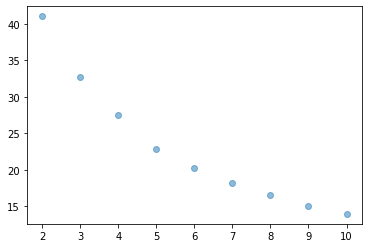

In [12]:
plt.scatter(VAF_K.iloc[:,0], VAF_K.iloc[:,1], alpha=0.5)
plt.show()

Using the elbow rule the k should be 5 since the curve is becoming flat


5. Run Kmeans (train Best K) on the test data set with the centers of the clusters from the train data solution as a starting point. Compare VAF, size of clusters, and centers of clusters of train and test solution. 

test.cluster = kmeans(X.test.scale, center=train.cluster$centers,nstart=50)

In [13]:
bestk=KMeans(n_clusters=5,n_init=100, max_iter=300, tol=0.0001, verbose=0,random_state = 1234)
bestk.fit(X_train_scale)
bestk_centers = bestk.cluster_centers_
bestk_centers

array([[0.01914717, 0.23095295, 0.73225381, 0.26453681, 0.34837286],
       [0.00095198, 0.58341805, 0.55232892, 0.19101262, 0.39343806],
       [0.0090496 , 0.28492346, 0.40988736, 0.08987469, 0.75052721],
       [0.11673475, 0.11090007, 0.81572948, 0.54541811, 0.16511387],
       [0.01641859, 0.13846816, 0.24867021, 0.37268902, 0.32837529]])

In [14]:
test = KMeans(n_clusters=5,init = bestk_centers,max_iter=300, tol=0.0001, verbose=0,random_state = 1234)
test.fit(X_test_scale)
test_centers = test.cluster_centers_
test_centers

array([[1.18438223e-02, 2.40665602e-01, 7.29574468e-01, 2.92792494e-01,
        3.40686499e-01],
       [6.50320364e-04, 6.92875801e-01, 5.10638298e-01, 1.46278776e-01,
        4.29421380e-01],
       [7.57151224e-03, 2.32195425e-01, 3.93057111e-01, 8.51196700e-02,
        8.02360593e-01],
       [1.82309174e-01, 6.68633651e-02, 8.13829787e-01, 5.67581862e-01,
        1.42829901e-01],
       [1.26416619e-02, 1.64830110e-01, 2.57092199e-01, 3.62582781e-01,
        3.64416476e-01]])

In [15]:
centroids_dataframe = pd.DataFrame(data=bestk_centers)
centroids_matrix = centroids_dataframe.values
X_train_scale_np = np.array(X_train_scale)

In [16]:
shap = (len(X_train_scale),5)
cluster_matrix = np.zeros(shap)

for i in range(5):     
    cluster_matrix[bestk.labels_ == i,i]=1.0

predicted_data = np.dot(cluster_matrix,centroids_matrix)

In [17]:
shap2 = (len(X_train_scale)*5,1)
print ("\nThe R-Square for train's", 5, "clusters is", (np.corrcoef(predicted_data.ravel(), X_train_scale_np.ravel())[0,1])**2)


The R-Square for train's 5 clusters is 0.8209172830158126


In [18]:
centroids_dataframe = pd.DataFrame(data=test_centers)
centroids_matrix = centroids_dataframe.values
X_test_scale_np = np.array(X_test_scale)

In [19]:
shap = (len(X_test_scale),5)
cluster_matrix = np.zeros(shap)

for i in range(5):     
    cluster_matrix[test.labels_ == i,i]=1.0

predicted_data = np.dot(cluster_matrix,centroids_matrix)

In [20]:
shap2 = (len(X_test_scale)*5,1)
print ("\nThe R-Square for test's", 5, "clusters is", (np.corrcoef(predicted_data.ravel(), X_test_scale_np.ravel())[0,1])**2)


The R-Square for test's 5 clusters is 0.829850546229079


In [21]:
train_cluster_size = np.bincount(bestk.labels_)
train_cluster_size

array([113,  74,  51,  84,  32])

In [22]:
test.labels_

array([1, 0, 3, 0, 3, 1, 0, 3, 1, 2, 3, 0, 0, 0, 1, 1, 3, 0, 3, 3, 1, 1,
       0, 4, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 3, 4, 0, 3, 3, 3, 0, 2, 0,
       3, 1, 1, 2, 0, 1, 0, 2, 4, 0, 2, 1, 3, 1, 1, 0, 2, 3, 0, 2, 3, 1,
       2, 0, 2, 2, 4, 0, 3, 4, 0, 3, 2, 1, 3, 3, 2, 2, 0, 3, 2, 3, 1, 1,
       0, 1, 0, 3, 0, 0, 4, 2, 3, 1, 1, 1, 0, 4, 4, 3, 3, 2, 3, 3, 4, 0,
       3, 1, 0, 1, 4, 1, 2, 1, 3, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 4,
       3, 3, 0, 3, 0, 2, 3, 4, 0, 3, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0],
      dtype=int32)

In [23]:
test_cluster_size = np.bincount(test.labels_)
test_cluster_size

array([50, 35, 19, 36, 12])

The VAF = 0.821 is similar for the train than the test VAF = 0.8299. The cluster size porportation is similar between the train and the test data. The center is also similar between the test and the train. 

train_cluster_size = np.bincount(bestk.labels_)
train_cluster_size

6. Consider restoring centers to original values by reversing scale function you chose. Interpret the centers of train & test clusters. Good results will have stability (centroid should be similar/unchanged) between train and test. What kind of groups have been created? 



In [24]:
def scaleback(df):
    df = pd.DataFrame(df)
    df.columns = Variables.columns
    ori = pd.DataFrame()
    for i in Variables:
        minmax_range = max(Xtrain[i]) - min(Xtrain[i])
        ori[i] = df[i].apply(lambda x : x*minmax_range + min(Xtrain[i]))
    return ori

In [25]:
test_centers_back = scaleback(test_centers)
test_centers_back

,CRIM,DIS,PTRATIO,LSTAT,MEDV
0,1.062771,3.405358,19.458000,12.340800,21.188000
1,0.066917,7.681503,17.400000,7.031143,25.065714
2,0.682676,3.325263,16.294737,4.814737,41.363158
3,16.228586,1.761867,20.250000,22.299167,12.541667
4,1.133753,2.688250,15.016667,14.870000,22.225000


In [26]:
bestk_centers_back = scaleback(bestk_centers)
bestk_centers_back

,CRIM,DIS,PTRATIO,LSTAT,MEDV
0,1.712529,3.313514,19.483186,11.316814,21.523894
1,0.093755,6.646459,17.791892,8.652297,23.493243
2,0.814177,3.823865,16.452941,4.987059,39.098039
3,10.394617,2.178282,20.267857,21.495952,13.515476
4,1.469775,2.438969,14.937500,15.236250,20.650000


The centers for the test and the train are veyr smimilar. Groups created:
1. The crime rate sits in the middle among all the groups. distance to employment center is in the middle. educational level is above average. status of the population is in the middle. The value for the houses is also in the middle. I would expect this group is for the middle class houses. 
2. Crime rate is the lowest, and has the longests distance to the employment centers. educational level below average, and status is above average, value for houses are also above average. I would expect this group to be the very large farms.
3. Low crime rate. close to centers. eudcational level average, stauts of the population very high. Value for the houses also very high. This group should be the wealthy people.
4. Crime rate very high. Close to centers, educational level very low, stauts of the people very low, value for house also very low. This group may represent the poor neighorbohood.
5. This group is similar to the first group with population status and education level below average. I would expect this is the cluster for lower middle class. 

7. Generate 3-5 Gaussian Mixtures (GM) with seed function for reproducibility on scaled train dataset (same as the one used for KMeans). For 50-100 random starts; there is a n_init parameter in python, no equivalent parameter in mclust (R package), Ignore this if you’re using R. Choose best mixture (component(s)) where AIC/BIC is low. That is your best GM solution.

In [27]:
from sklearn.mixture import GaussianMixture

mymixture = GaussianMixture(n_components=3,n_init=100,random_state=1234)
mixresults=mymixture.fit(X_train_scale)
bestGM = mixresults
bestGM.means_

array([[0.00228044, 0.36888263, 0.60853391, 0.23909901, 0.40870591],
       [0.12941023, 0.10422051, 0.80851064, 0.4504373 , 0.2458465 ],
       [0.01972849, 0.07929999, 0.18121255, 0.31470455, 0.45658495]])

In [28]:
print(mymixture.aic(X_train_scale))
print(mymixture.bic(X_train_scale))

-4313.280841183421
-4073.384432569127


In [29]:
mymixture = GaussianMixture(n_components=4,n_init=100,random_state=1234)
mixresults=mymixture.fit(X_train_scale)
print(mymixture.aic(X_train_scale))
print(mymixture.bic(X_train_scale))

-4537.372276351314
-4216.220632561211


In [30]:
mymixture = GaussianMixture(n_components=5,n_init=100,random_state=1234)
mixresults=mymixture.fit(X_train_scale)
print(mymixture.aic(X_train_scale))
print(mymixture.bic(X_train_scale))

-4750.527943685689
-4348.121064719777


AIC and BIC is the lowest when n_components = 3

8. Build a GM model with best components on train data and compare it with train KMeans solution from an interpretability perspective.

In [31]:
mymixture = GaussianMixture(n_components=3,n_init=100,random_state=1234)
mixresults=mymixture.fit(Xtrain)
mixresults.means_

array([[11.71721711,  2.15636026, 20.2       , 18.59462594, 15.54535841],
       [ 1.94293344,  2.37487172, 15.15502233, 10.5107782 , 32.77748924],
       [ 0.21516274,  4.61789514, 18.41976424, 10.66498849, 23.25596372]])

In [32]:
GM_centers = pd.DataFrame(mixresults.means_)
GM_centers.columns = ['CRIM','DIS','PTRATIO','LSTAT','MEDV']
GM_centers

,CRIM,DIS,PTRATIO,LSTAT,MEDV
0,11.717217,2.156360,20.200000,18.594626,15.545358
1,1.942933,2.374872,15.155022,10.510778,32.777489
2,0.215163,4.617895,18.419764,10.664988,23.255964


9. Compare the chosen k-means training data solution with the chosen GM solution in the
training data from an interpretability perspective.
10. Summarize results and interpret the clusters/segments you choose as your final solution.

The GM model produce only 3 clusters than the kmeans. The groups from the GM model are:
1. Very high crime rate. Close to employment centers. Educatioanl quality is low, status of population is low, and value for house is low. This group could represent the lower class neighborhood.
2. Medium crime rate. Close to employement centers. Educational quality is high, status of population is high, and Value for houses is high. I think this cluster represent the upper middle to upper class neighborhood.
3. Very low crime rate. Distance to employment center is high. Educational quality is medium. Status is similar to the second cluster, and value for house is medium. I think this cluster represents the middle class live in the farmland neighborhood. 

I will use the 3 clusters from the GM model as my final results. Both the kmeans clusters and the GM models produce clusters that is very distinctive. The five clusters from the Kemans cluster have middle class, wealthy, large farms, lower class, and lower middle class. The 3 clusters for the GM model is very straightforward, and it has lower, upper and middle , and farm land class houses. I believe the GM is a better final result because it produces less cluster than the Kmeans method, and each cluster is more distinctive than the kmeans class. Since two groups from the kmeans method are very similar. Therefore, the three groups from the GM model will be my final result.


Business Application:
    We can use the clusters to determine the approximate value for the house. For example, if the crime rate near the house is low, and the house is close to employemnet center, and the people who near the house have middle to high status social class, Then it is reasonable to put the house in the first cluster. We can except the house to be high value